# **Step 1: Importing necessary libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

# **Step 2: Loading the dataset**

In [ ]:
from google.colab import files

# Upload files
uploaded = files.upload()

Saving car data.csv to car data.csv


In [ ]:
df = pd.read_csv("car data.csv")

In [ ]:
# Display the first few rows of the dataset
print("First 5 rows of the dataset:")
print(df.head())


First 5 rows of the dataset:
  Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Selling_type Transmission  Owner  
0       Dealer       Manual      0  
1       Dealer       Manual      0  
2       Dealer       Manual      0  
3       Dealer       Manual      0  
4       Dealer       Manual      0  


In [ ]:
# Display basic information about the dataset
print("\nDataset Information:")
print(df.info())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB
None


In [ ]:
# Summary statistics
print("\nSummary Statistics:")
print(df.describe())



Summary Statistics:
              Year  Selling_Price  Present_Price     Driven_kms       Owner
count   301.000000     301.000000     301.000000     301.000000  301.000000
mean   2013.627907       4.661296       7.628472   36947.205980    0.043189
std       2.891554       5.082812       8.642584   38886.883882    0.247915
min    2003.000000       0.100000       0.320000     500.000000    0.000000
25%    2012.000000       0.900000       1.200000   15000.000000    0.000000
50%    2014.000000       3.600000       6.400000   32000.000000    0.000000
75%    2016.000000       6.000000       9.900000   48767.000000    0.000000
max    2018.000000      35.000000      92.600000  500000.000000    3.000000


# **Step 3: Exploratory Data Analysis (EDA)**

In [ ]:
# Check for missing values
print("\nMissing Values in Each Column:")
print(df.isnull().sum())


Missing Values in Each Column:
Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64


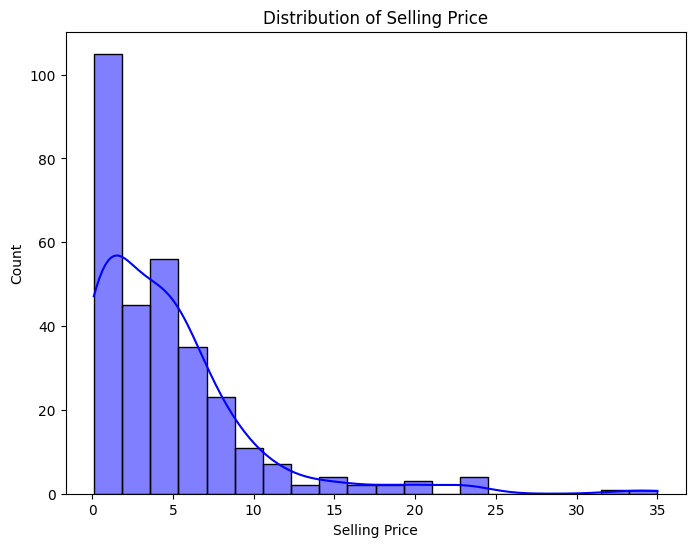

In [ ]:
# Visualize the distribution of Selling_Price
plt.figure(figsize=(8, 6))
sns.histplot(df['Selling_Price'], kde=True, color='blue', bins=20)
plt.title('Distribution of Selling Price')
plt.xlabel('Selling Price')
plt.ylabel('Count')
plt.show()

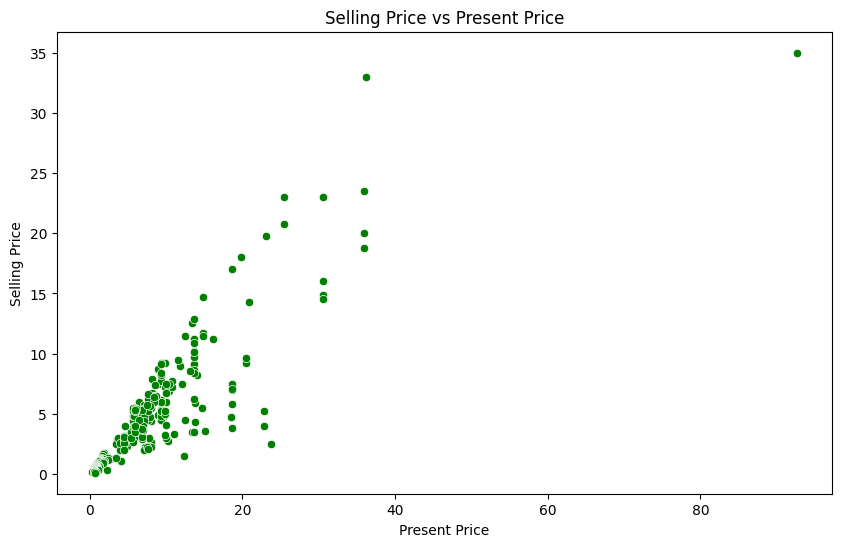

In [ ]:
# Visualize relationships between numerical features
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Present_Price', y='Selling_Price', data=df, color='green')
plt.title('Selling Price vs Present Price')
plt.xlabel('Present Price')
plt.ylabel('Selling Price')
plt.show()


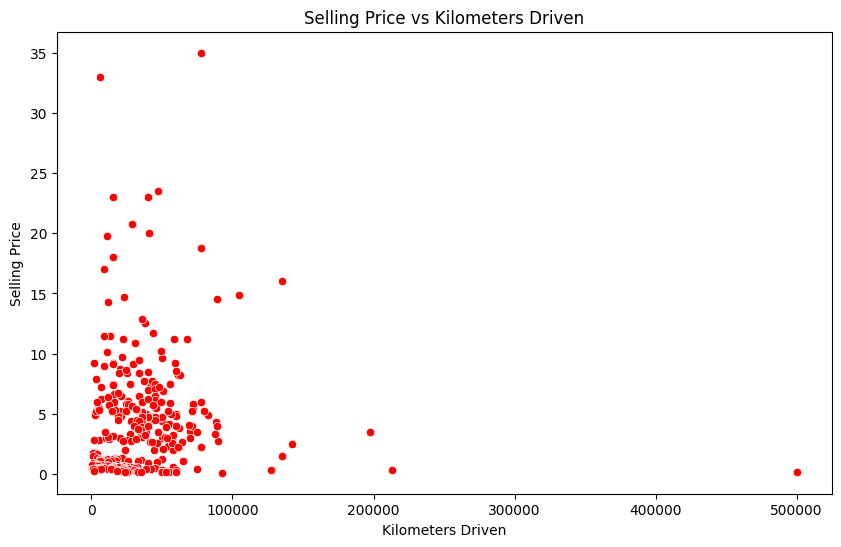

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Driven_kms', y='Selling_Price', data=df, color='red')
plt.title('Selling Price vs Kilometers Driven')
plt.xlabel('Kilometers Driven')
plt.ylabel('Selling Price')
plt.show()

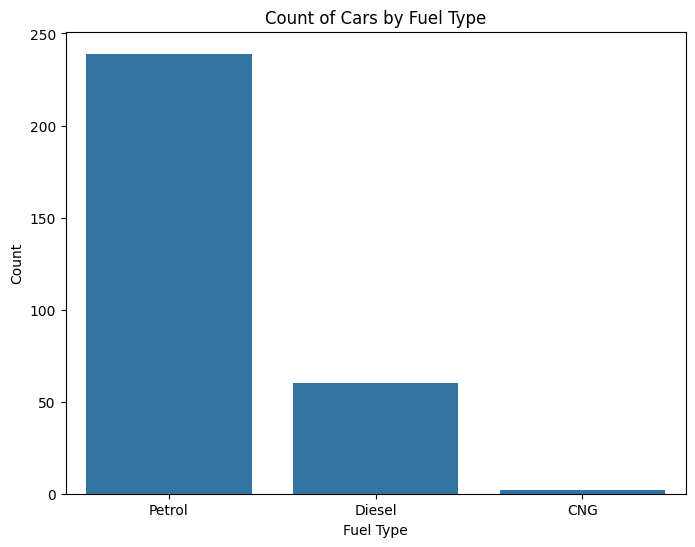

In [ ]:
# Analyze categorical variables
plt.figure(figsize=(8, 6))
sns.countplot(x='Fuel_Type', data=df)
plt.title('Count of Cars by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Count')
plt.show()

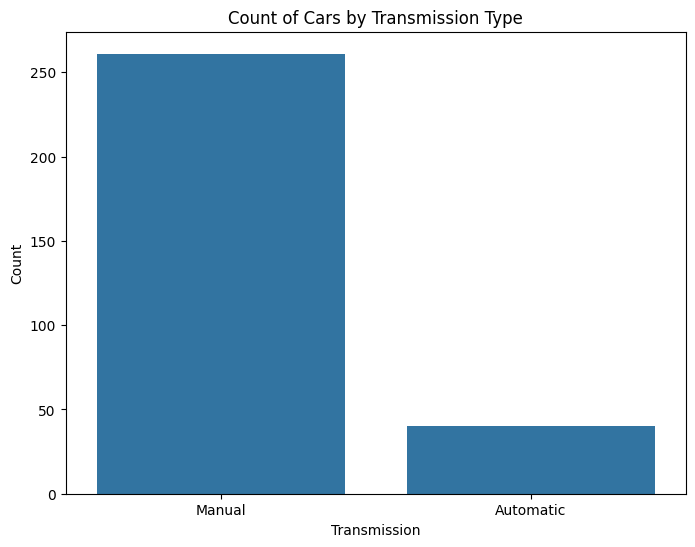

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Transmission', data=df)
plt.title('Count of Cars by Transmission Type')
plt.xlabel('Transmission')
plt.ylabel('Count')
plt.show()

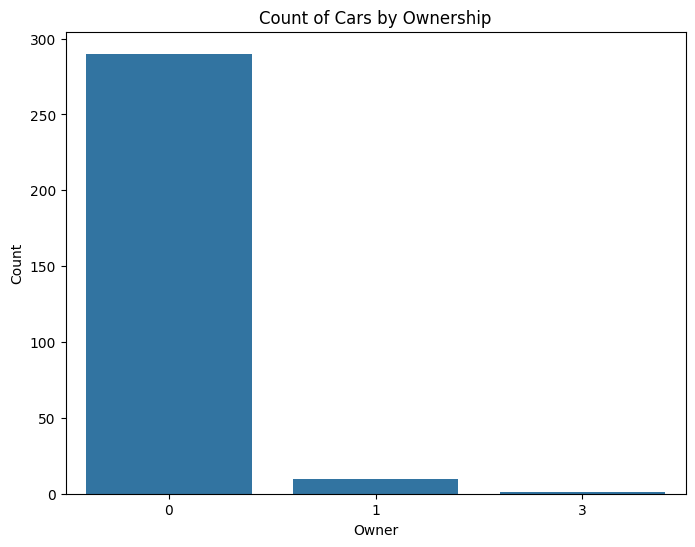

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Owner', data=df)
plt.title('Count of Cars by Ownership')
plt.xlabel('Owner')
plt.ylabel('Count')
plt.show()


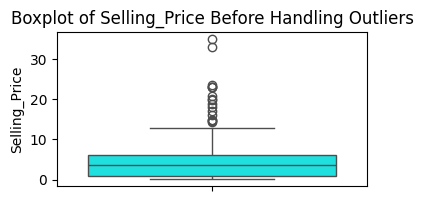

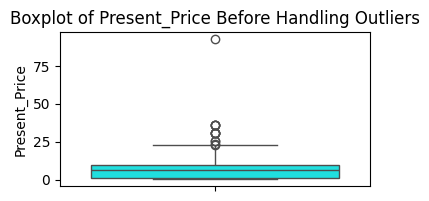

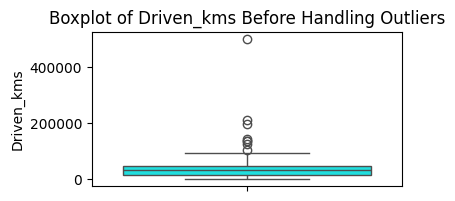

In [ ]:
# Outlier Detection for Each Column
numerical_features = ['Selling_Price', 'Present_Price', 'Driven_kms']
for column in numerical_features:
    plt.figure(figsize=(4, 2))
    sns.boxplot(y=df[column], color='cyan')
    plt.title(f'Boxplot of {column} Before Handling Outliers')
    plt.ylabel(column)
    plt.show()

In [ ]:
# Outlier Handling using IQR method
def handle_outliers(df, columns):
    for column in columns:
        # Calculate IQR
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Remove outliers
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

df = handle_outliers(df, numerical_features)

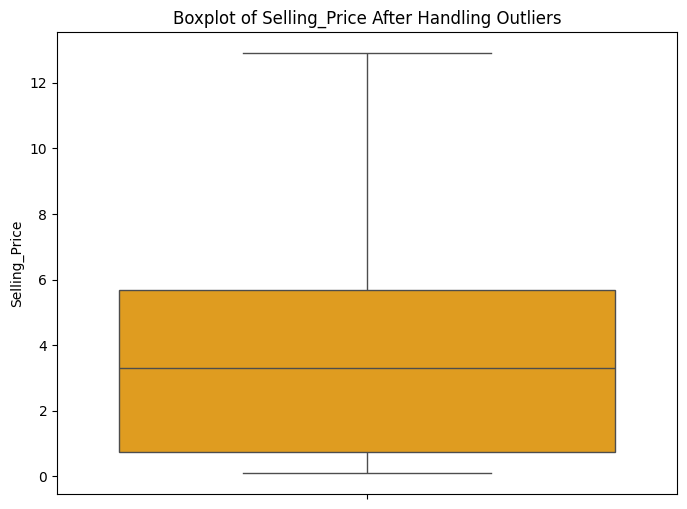

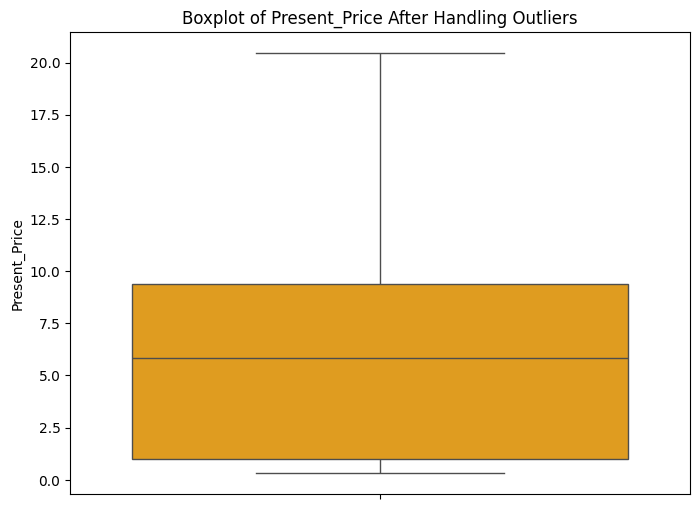

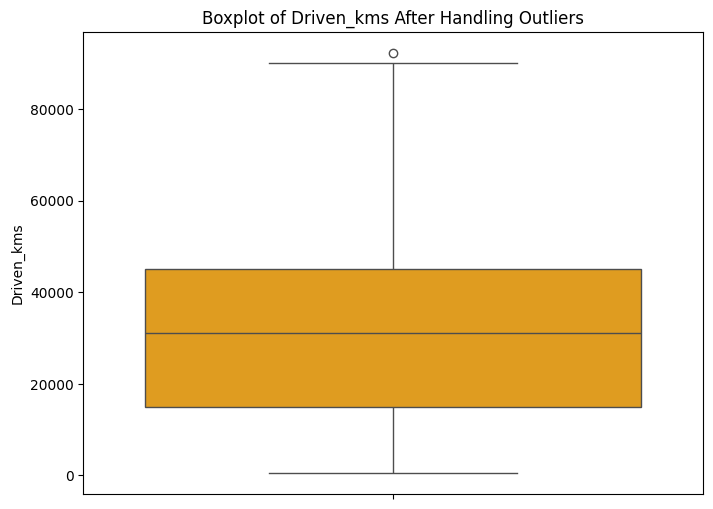

In [ ]:
# Boxplot After Handling Outliers
for column in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(y=df[column], color='orange')
    plt.title(f'Boxplot of {column} After Handling Outliers')
    plt.ylabel(column)
    plt.show()

In [ ]:
print("\nData after handling outliers:")
print(df.describe())


Data after handling outliers:
              Year  Selling_Price  Present_Price    Driven_kms       Owner
count   276.000000     276.000000     276.000000    276.000000  276.000000
mean   2013.750000       3.754928       6.011848  32120.913043    0.036232
std       2.681757       3.067865       4.798365  20722.825248    0.187206
min    2003.000000       0.100000       0.320000    500.000000    0.000000
25%    2012.000000       0.750000       0.990000  15000.000000    0.000000
50%    2014.000000       3.300000       5.835000  31213.500000    0.000000
75%    2016.000000       5.675000       9.400000  45128.500000    0.000000
max    2018.000000      12.900000      20.450000  92233.000000    1.000000


In [ ]:
# Step 4: Data Preprocessing

# Encode categorical variables using Label Encoding
categorical_features = ['Fuel_Type', 'Transmission', 'Owner']
label_encoders = {}
for feature in categorical_features:
    label_encoders[feature] = LabelEncoder()
    df[feature] = label_encoders[feature].fit_transform(df[feature])

print("\nData after encoding categorical variables:")
print(df.head())

# Separate features and target variable
X = df.drop(columns=['Selling_Price'], axis=1)
y = df['Selling_Price']

# Feature scaling for numerical variables
scaler = StandardScaler()
numerical_features = ['Present_Price', 'Driven_kms']
X[numerical_features] = scaler.fit_transform(X[numerical_features])

print("\nFeatures after scaling:")
print(X.head())

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nTraining set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")



Data after encoding categorical variables:
  Car_Name  Year  Selling_Price  Present_Price  Driven_kms  Fuel_Type  \
0     ritz  2014           3.35           5.59       27000          2   
1      sx4  2013           4.75           9.54       43000          1   
2     ciaz  2017           7.25           9.85        6900          2   
3  wagon r  2011           2.85           4.15        5200          2   
4    swift  2014           4.60           6.87       42450          1   

  Selling_type  Transmission  Owner  
0       Dealer             1      0  
1       Dealer             1      0  
2       Dealer             1      0  
3       Dealer             1      0  
4       Dealer             1      0  

Features after scaling:
  Car_Name  Year  Present_Price  Driven_kms  Fuel_Type Selling_type  \
0     ritz  2014      -0.088075   -0.247564          2       Dealer   
1      sx4  2013       0.736618    0.525935          1       Dealer   
2     ciaz  2017       0.801340   -1.219270        

In [ ]:
# Drop 'Car_Name' column as it is not directly relevant for prediction
df = df.drop(columns=['Car_Name'], axis=1)

# Check for non-numeric data again
print("\nData types after dropping irrelevant columns:")
print(df.dtypes)



Data types after dropping irrelevant columns:
Year               int64
Selling_Price    float64
Present_Price    float64
Driven_kms         int64
Fuel_Type          int64
Selling_type      object
Transmission       int64
Owner              int64
dtype: object


In [ ]:
# Identify all categorical columns
categorical_features = X.select_dtypes(include=['object']).columns
print("Categorical columns to encode:", categorical_features)

# Apply One-Hot Encoding to these columns
X = pd.get_dummies(X, columns=categorical_features, drop_first=True)

# Feature scaling for numerical variables
numerical_features = ['Present_Price', 'Driven_kms']
scaler = StandardScaler()
X[numerical_features] = scaler.fit_transform(X[numerical_features])

print("\nFeatures after encoding and scaling:")
print(X.head())

# Re-split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nUpdated Training set size: {X_train.shape}")
print(f"Updated Test set size: {X_test.shape}")

# Train and evaluate the models again



Categorical columns to encode: Index(['Car_Name', 'Selling_type'], dtype='object')

Features after encoding and scaling:
   Year  Present_Price  Driven_kms  Fuel_Type  Transmission  Owner  \
0  2014      -0.088075   -0.247564          2             1      0   
1  2013       0.736618    0.525935          1             1      0   
2  2017       0.801340   -1.219270          2             1      0   
3  2011      -0.388722   -1.301455          2             1      0   
4  2014       0.179167    0.499346          1             1      0   

   Car_Name_Activa 4g  Car_Name_Bajaj  ct 100  Car_Name_Bajaj Avenger 150  \
0               False                   False                       False   
1               False                   False                       False   
2               False                   False                       False   
3               False                   False                       False   
4               False                   False                       False

In [ ]:
# Train Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make Predictions
y_pred_lr = lr_model.predict(X_test)

# Evaluate the Model
r2_lr = r2_score(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)

print("\nLinear Regression Performance:")
print(f"R2 Score: {r2_lr:.2f}")
print(f"Mean Squared Error: {mse_lr:.2f}")


Linear Regression Performance:
R2 Score: 0.84
Mean Squared Error: 1.38


In [ ]:
# Train Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Make Predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the Model
r2_rf = r2_score(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)

print("\nRandom Forest Regressor Performance:")
print(f"R2 Score: {r2_rf:.2f}")
print(f"Mean Squared Error: {mse_rf:.2f}")



Random Forest Regressor Performance:
R2 Score: 0.90
Mean Squared Error: 0.86


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Grid Search
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, n_jobs=-1, scoring='r2')
grid_search.fit(X_train, y_train)

# Best Parameters
print("\nBest Parameters from Grid Search:")
print(grid_search.best_params_)

# Evaluate the optimized model
optimized_rf_model = grid_search.best_estimator_
y_pred_optimized_rf = optimized_rf_model.predict(X_test)

# Performance Metrics
r2_optimized_rf = r2_score(y_test, y_pred_optimized_rf)
mse_optimized_rf = mean_squared_error(y_test, y_pred_optimized_rf)

print("\nOptimized Random Forest Performance:")
print(f"R2 Score: {r2_optimized_rf:.2f}")
print(f"Mean Squared Error: {mse_optimized_rf:.2f}")



Best Parameters from Grid Search:
{'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

Optimized Random Forest Performance:
R2 Score: 0.90
Mean Squared Error: 0.84


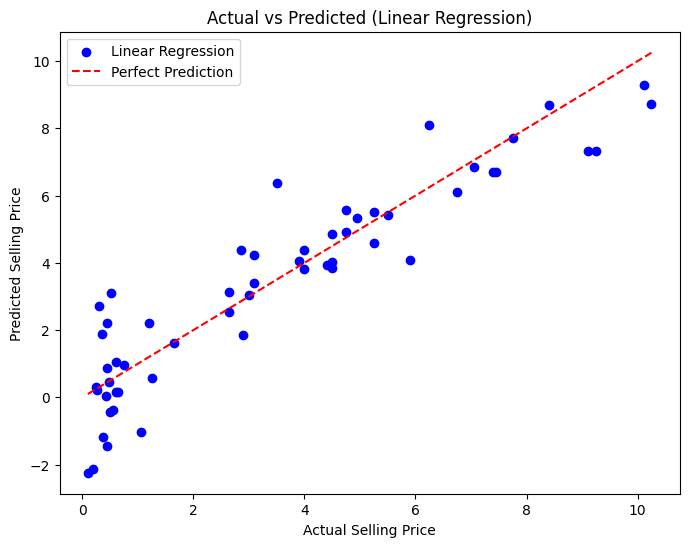

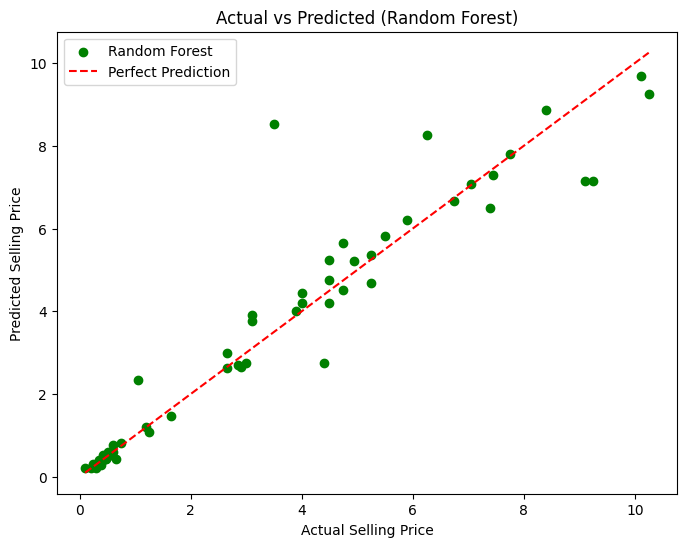

In [ ]:
# Plot Actual vs Predicted for Linear Regression
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_lr, color='blue', label='Linear Regression')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Prediction')
plt.title('Actual vs Predicted (Linear Regression)')
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')
plt.legend()
plt.show()

# Plot Actual vs Predicted for Random Forest
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf, color='green', label='Random Forest')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Prediction')
plt.title('Actual vs Predicted (Random Forest)')
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')
plt.legend()
plt.show()


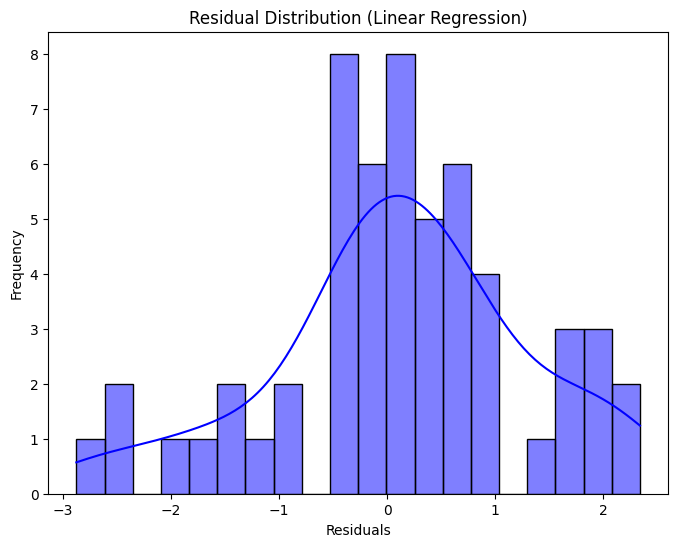

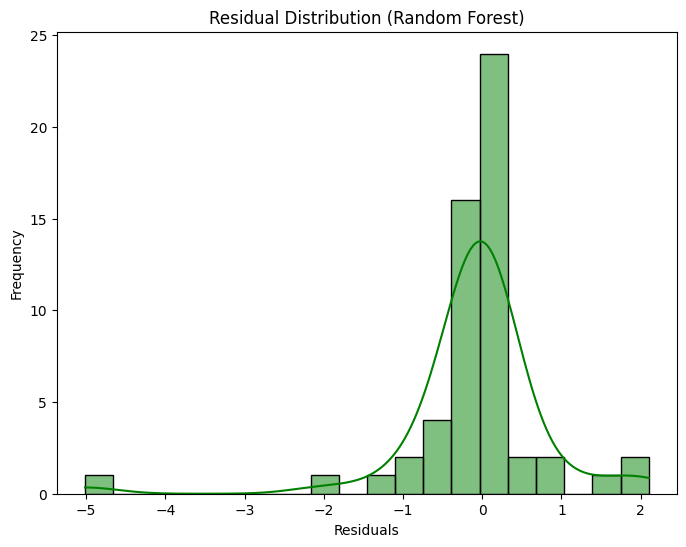

In [ ]:
# Residuals for Linear Regression
residuals_lr = y_test - y_pred_lr

# Residual Plot for Linear Regression
plt.figure(figsize=(8, 6))
sns.histplot(residuals_lr, kde=True, color='blue', bins=20)
plt.title('Residual Distribution (Linear Regression)')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Residuals for Random Forest
residuals_rf = y_test - y_pred_rf

# Residual Plot for Random Forest
plt.figure(figsize=(8, 6))
sns.histplot(residuals_rf, kde=True, color='green', bins=20)
plt.title('Residual Distribution (Random Forest)')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()
